# Homework Assignment 1

_Due by 09-FEB-2021_

The data for this homework assignment is sourced from the UCI Machine Learning Repository. This [link](https://archive.ics.uci.edu/ml/datasets/Wine+Quality) includes a brief description of all columns (features) available this dataset. You can download this data set from BlackBoard under the `Data` folder to your local computer and then read those files into Python. 

Answer the following questions based on this dataset. Submit a Jupyter Notebook that contains all your code that you used to answer these questions. You can post your submission on Canvas or via email (patelvj2@vcu.edu). The Jupyter Notebook must be fully executable with no/minimal changes (such as the location of the input file).

**1. Plot histograms for all variables in this data set. Add a vertical line to show the average value of each variable. Add a chart title for each chart.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"../data/winequality.csv")

In [2]:
df = df.drop(df.columns[0], axis=1)

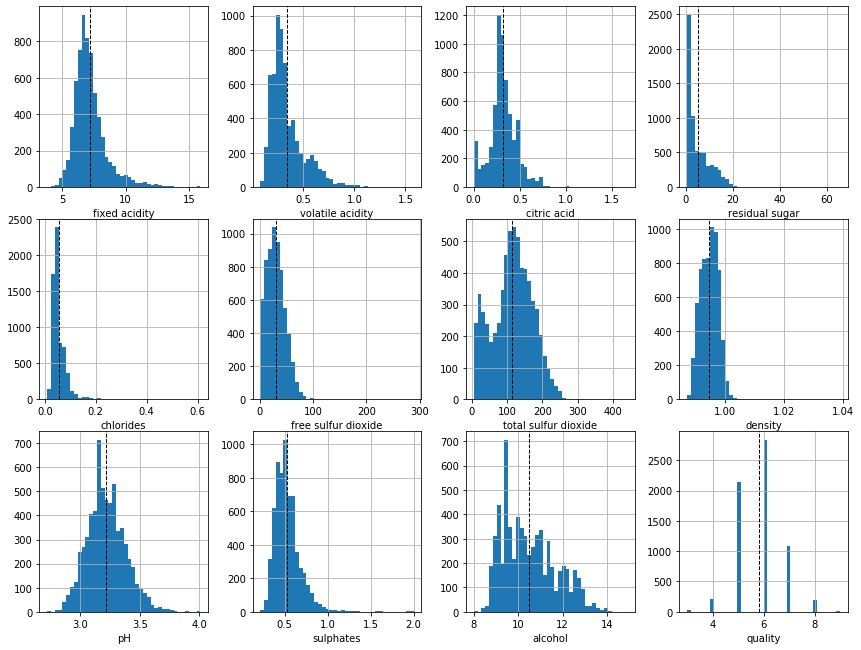

In [3]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize = (12, 9))

num_cols = df.columns[:-1]

fig.tight_layout()
for i, this_ax in enumerate(axes.flat):
    col = num_cols[i]
    df[col].hist(bins=40, ax=this_ax)
    this_ax.axvline(df[col].mean(), color='k', linestyle='dashed', linewidth=1)
    this_ax.set_xlabel(col)
    ;

**2. Identify two features that are most correlated with each other. Visualize their relationship using an appropriate chart type.**

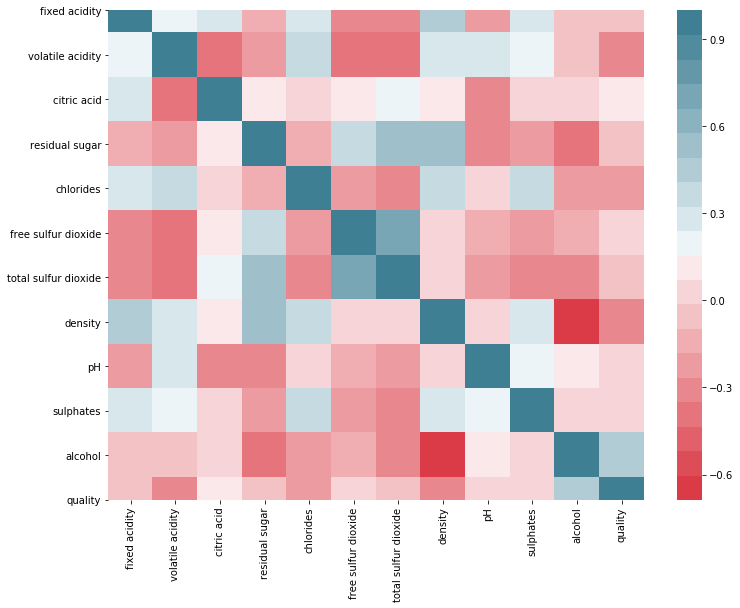

In [4]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 9))
my_cmap = sns.diverging_palette(10, 220, n=20)
sns.heatmap(corr_matrix, cmap = my_cmap);

### Denisty and Alcohol are the most negatively correlated and Free Sulfur Dioxide and Total Sulfur Dioxide are the most positively correlated

**3. Identify the feature that is most correlated with the wine quality and plot their relationship using an appropriate chart type.**

In [5]:
corr_matrix['quality']

fixed acidity          -0.076743
volatile acidity       -0.265699
citric acid             0.085532
residual sugar         -0.036980
chlorides              -0.200666
free sulfur dioxide     0.055463
total sulfur dioxide   -0.041385
density                -0.305858
pH                      0.019506
sulphates               0.038485
alcohol                 0.444319
quality                 1.000000
Name: quality, dtype: float64

### Alcohol is the most correlated with wine quality

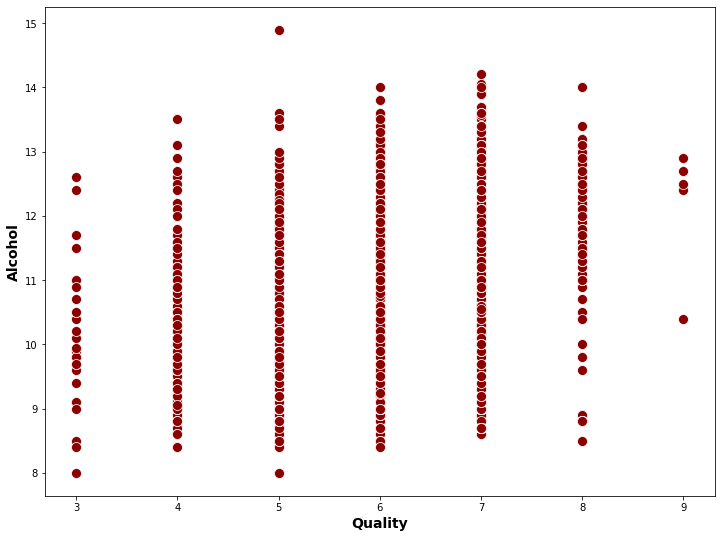

In [6]:
plt.figure(figsize=[12, 9])

ax = sns.scatterplot(x='quality', y='alcohol', data=df, color='darkred', s=100)

plt.xlabel('Quality', fontsize=14, weight='bold')
plt.ylabel('Alcohol', fontsize=14, weight='bold');

**4. Calcuate average alcohol content for each wine quality score. Store the average alcohol content for the best quality wine in a variable called `avg_alcohol_for_best_wine` and print it using the following statement:**

`print(f'The average alcohol content for the best wine is {avg_alcohol_for_best_wine}.')`

In [7]:
avg_alcohol_by_quality = df.groupby('quality')['alcohol'].mean()
avg_alcohol_for_best_wine = avg_alcohol_by_quality[9]
print(f'The average alcohol content for the best wine is {avg_alcohol_for_best_wine}.')

The average alcohol content for the best wine is 12.18.


**5. Calculate correlation coefficients between wine quality and all other features _separately for each wine type_. Identify any one feature that has contradictory relationships across the wine type. (For example, a feture has positive correlation with the wine quality for red wines, and negative correlation coefficients with the wine quality of white wines.)**

**Plot the relationship of the selected feature with wine quality using an appropriate chart type.**

In [8]:
wine_type_cormatrix = df.groupby("wine type").corr()
wine_type_cormatrix[['quality']]

quality
wine type                               
Red       fixed acidity         0.124052
          volatile acidity     -0.390558
          citric acid           0.226373
          residual sugar        0.013732
          chlorides            -0.128907
          free sulfur dioxide  -0.050656
          total sulfur dioxide -0.185100
          density              -0.174919
          pH                   -0.057731
          sulphates             0.251397
          alcohol               0.476166
          quality               1.000000
White     fixed acidity        -0.113663
          volatile acidity     -0.194723
          citric acid          -0.009209
          residual sugar       -0.097577
          chlorides            -0.209934
          free sulfur dioxide   0.008158
          total sulfur dioxide -0.174737
          density              -0.307123
          pH                    0.099427
          sulphates             0.053678
          alcohol               0.435575
          quality               1.000000

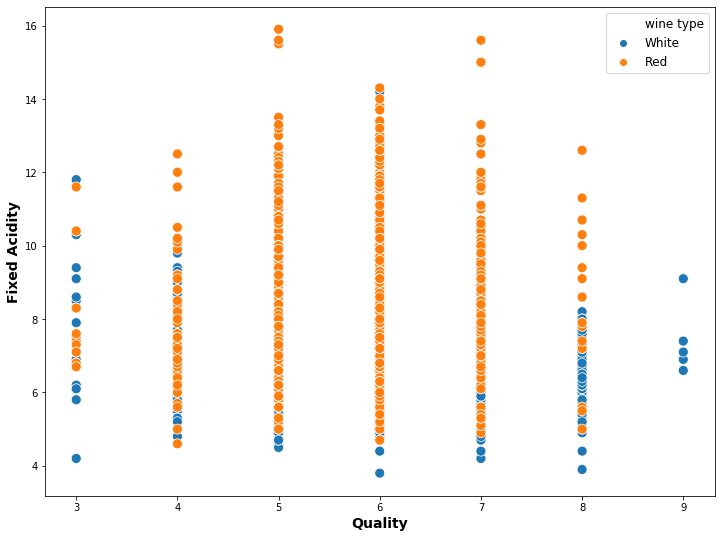

In [9]:
plt.figure(figsize=[12, 9])

sns.scatterplot(x='quality', y="fixed acidity", data=df, color='tomato', s=100, hue="wine type")

plt.xlabel('Quality', fontsize=14, weight='bold')
plt.ylabel("Fixed Acidity", fontsize=14, weight='bold')
plt.legend(loc='upper right', fontsize=12);

**6. Create a dataframe (see example below) that contains one the overall average for each variable as well as its average value for Red and White wines. Divide both averages by the overall average to create an index for each variable. Multiply the index columns by 100. Which two variables have the highest index?**

|                 | Red      | White    | Overall  | White_Index | Red_Index  |
|-----------------|----------|----------|----------|-------------|------------|
|fixed acidity	  | 8.319637 | 6.854788 | 7.215307 | 95.003409   | 115.305381 |
|volatile acidity |	0.527821 | 0.278241	| 0.339666 | 81.916094   | 155.3939   |
|.................|..........|..........|..........|.............|............|

In [10]:
df_overall = df.groupby("wine type").mean().T
df_overall

wine type,Red,White
fixed acidity,8.319637,6.854788
volatile acidity,0.527821,0.278241
citric acid,0.270976,0.334192
residual sugar,2.538806,6.391415
chlorides,0.087467,0.045772
free sulfur dioxide,15.874922,35.308085
total sulfur dioxide,46.467792,138.360657
density,0.996747,0.994027
pH,3.311113,3.188267
sulphates,0.658149,0.489847


In [11]:
df_avg = df.mean()
df_final = df_avg.to_frame().join(df_overall).reset_index()
df_final

,index,0,Red,White
0,fixed acidity,7.215307,8.319637,6.854788
1,volatile acidity,0.339666,0.527821,0.278241
2,citric acid,0.318633,0.270976,0.334192
3,residual sugar,5.443235,2.538806,6.391415
4,chlorides,0.056034,0.087467,0.045772
5,free sulfur dioxide,30.525319,15.874922,35.308085
6,total sulfur dioxide,115.744574,46.467792,138.360657
7,density,0.994697,0.996747,0.994027
8,pH,3.218501,3.311113,3.188267
9,sulphates,0.531268,0.658149,0.489847


In [12]:
df_final = df_final.rename(columns={0: 'Overall'})
df_final = df_final.rename(columns={'index': ''})
df_final['White_Index'] = (df_final['White'] / df_final['Overall']) * 100
df_final['Red_Index'] = (df_final['Red'] / df_final['Overall']) * 100
df_final = df_final[['', 'Red', 'White', 'Overall', 'White_Index', 'Red_Index']]
df_final

,,Red,White,Overall,White_Index,Red_Index
0,fixed acidity,8.319637,6.854788,7.215307,95.003409,115.305381
1,volatile acidity,0.527821,0.278241,0.339666,81.916094,155.393979
2,citric acid,0.270976,0.334192,0.318633,104.882822,85.043114
3,residual sugar,2.538806,6.391415,5.443235,117.419411,46.641480
4,chlorides,0.087467,0.045772,0.056034,81.686956,156.095866
5,free sulfur dioxide,15.874922,35.308085,30.525319,115.668192,52.005752
6,total sulfur dioxide,46.467792,138.360657,115.744574,119.539648,40.146843
7,density,0.996747,0.994027,0.994697,99.932717,100.206098
8,pH,3.311113,3.188267,3.218501,99.060612,102.877500
9,sulphates,0.658149,0.489847,0.531268,92.203299,123.882579


**7. Replace 'Red' with 1 and 'White' with 0 in the `wine quality` column. What percentage of all records in the dataset are for Red wines?**

In [13]:
df_rpl = df
df_rpl["wine type"] = df_rpl["wine type"].map({'Red': 1, 'White': 0})

In [14]:
df_rpl.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [22]:
wine_per = (df_rpl.groupby("wine type").size() / len(df_rpl)) * 100
red_per = round(wine_per[1],2)
print(f'The percentage of all records that are Red wines is {red_per}%.')

The percentage of all records that are Red wines is 24.61%.
